# Jupyter notebooks - hands on Python

In [1]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from feature_weighting import chi2, IGR
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt

### SETTINGS

In [2]:
#mainDir = "//LS-WVL114/share/Ponudbe_predstavitve_marketing/DataScienceMeetup-handsOn - 2016-01-14/"
    
path_train_x = "BankData/bank-full.csv"
#save_path = mainDir + "pyModel/"

classifier = "y"
classifierLevel = "yes" # katerega zelimo oznaciti z 1

### DATA MANIPULATION

In [3]:
# nalozimo podatke
data = pandas.io.parsers.read_csv(path_train_x,sep=";")

# how many with yes response
data.y.value_counts()

# vzamemo le kar rabimo
classColumn = classifier + "." + classifierLevel
trainColumns = ["duration","month","contact","poutcome","pdays","day","housing",classifier]
subData = data[trainColumns]
otherData = data.drop(trainColumns,1)

# raztegnemo kategorijske stolpce
raztegnjeno = pandas.DataFrame()
for column in subData:
    tmpCol = subData[column]
    if tmpCol.dtype == "object":
        factors = tmpCol.unique()
        for i in range(0,len(factors)-1):
            # v primeru da gre za classifer, potem oznacimo yes z 1
            if column == classifier:
                factors[i] = classifierLevel
                tmpCol2 = tmpCol == factors[i]
            else:
                tmpCol2 = tmpCol == factors[i]
            tmpCol2 = tmpCol2.astype("int32")
            #tmpCol2.columns = [column + "." + factors[i]]
            raztegnjeno[column + "." + factors[i]] = tmpCol2
    else:
        raztegnjeno[column] = tmpCol

### TRAIN AND TEST

In [4]:
trainData = raztegnjeno.sample(frac=0.1)

# test je vse ostalo
testData = raztegnjeno.drop(trainData.index)

In [5]:
# preverimo da to res deluje
indxTest = testData.index.to_series().tolist()
indxTrain = trainData.index.to_series().tolist()
set(indxTest).intersection(indxTrain)      

set()

In [6]:
# razdelimo na classifier in train feature set
train_set_x = np.asarray(trainData.drop([classColumn],1), dtype=np.float32)
train_set_y = np.array(trainData[classColumn], dtype = int)

In [7]:
train_set_x

array([[ 150.,    0.,    0., ...,   -1.,    1.,    0.],
       [ 215.,    0.,    1., ...,   -1.,   16.,    0.],
       [ 207.,    0.,    0., ...,   -1.,   17.,    0.],
       ..., 
       [ 208.,    1.,    0., ...,   -1.,    6.,    1.],
       [  67.,    0.,    0., ...,   -1.,   11.,    1.],
       [ 129.,    0.,    1., ...,   -1.,    6.,    0.]], dtype=float32)

### WEIGHTS & MODEL

In [7]:
weights = chi2(train_set_x, train_set_y)

# model
forest = RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=-1, verbose=10)

# fitting
forest.fit(train_set_x, train_set_y, feature_weight=weights)

# v model dodamo podatke o uporabljenih featurejih
forest.featureNames = list(raztegnjeno.columns.values)

Calculating 0 / 20
Calculating 1 / 20
Calculating 2 / 20
Calculating 3 / 20
Calculating 4 / 20
Calculating 5 / 20
Calculating 6 / 20
Calculating 7 / 20
Calculating 8 / 20
Calculating 9 / 20
Calculating 10 / 20
Calculating 11 / 20
Calculating 12 / 20
Calculating 13 / 20
Calculating 14 / 20
Calculating 15 / 20
Calculating 16 / 20
Calculating 17 / 20
Calculating 18 / 20
Calculating 19 / 20
1.0

[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.1s
[Paralle


building tree 1 of 500building tree 2 of 500

building tree 3 of 500 
building tree 5 of 500building tree 4 of 500

building tree 6 of 500 
building tree 7 of 500building tree 8 of 500

building tree 9 of 500building tree 10 of 500

building tree 11 of 500
 building tree 12 of 500building tree 13 of 500

building tree 14 of 500
building tree 15 of 500building tree 16 of 500

building tree 17 of 500building tree 18 of 500

 building tree 19 of 500
 building tree 20 of 500
building tree 21 of 500 
building tree 22 of 500
building tree 23 of 500
 building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
 building tree 33 of 500building tree 34 of 500

 building tree 35 of 500
 building tree 36 of 500
 building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500building tree 41 of 500

building tree

### PREDICTIONS

In [8]:
test_set_x = np.asarray(testData.drop([classColumn],1), dtype=np.float32)
predictions = forest.predict_proba(test_set_x)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Do

# Plot the lift curve on the test set

In [9]:
##### LETS PLOT A GRAPH
# random vs. naivna vs. randomForest

# naivna
naivna = otherData.balance.to_frame()
naivna[classColumn] = raztegnjeno[classColumn]

# rf
testClass = testData[classColumn].astype("float32").to_frame()
rfresult = pandas.DataFrame(predictions,dtype="float32",index=testData.index).drop(0,1)
rfresult.columns = ["predictions"]
rfresult[classColumn] = testClass.values

# dodamo se train set na zacetek
rfresult = pandas.DataFrame({"predictions":1,classColumn:trainData[classColumn]},index=trainData.index).append(rfresult)

# skupajTest
skupajTest = pandas.DataFrame(
{
"random":testData.sample(frac=1)[classColumn].values,
"balance": naivna.loc[testData.index].sort_values("balance",ascending=False)[classColumn].values,
"rf": rfresult.loc[testData.index].sort_values("predictions",ascending=False)[classColumn].values
}
).apply(np.cumsum,axis=0)

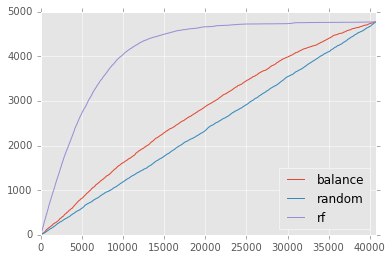

In [10]:
# graf
matplotlib.style.use('ggplot')
skupajTest.plot(); plt.show()

In [11]:
####
# skupaj vse
skupaj = pandas.DataFrame(
{
#"id": range(1,randomContact.count()+1),
"random":raztegnjeno.sample(frac=1)[classColumn].values,
"balance": naivna.sort_values("balance",ascending=False)[classColumn].values,
"rf": rfresult.sort_values("predictions",ascending=False)[classColumn].values
}
).apply(np.cumsum,axis=0)

In [12]:
noContact = 12000

result = skupaj[["random","balance","rf"]][noContact:(noContact+1)].T
result.columns = ["responded"]


result["contacted"] = noContact
result["improvement"] = result.responded/result.responded["random"]
result[["contacted","responded","improvement"]]

,contacted,responded,improvement
random,12000,1367,1.000000
balance,12000,1906,1.394294
rf,12000,4022,2.942209
